In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn.model_selection 

In [2]:
data_vonck = pd.read_csv("Data-Vonck et al 2020 Blueberry NIR.csv")
data_vonck.head()

,Sample_number,Measuring_side,Taste_character,Device_number,Replicate_number,X1,X2,X3,X4,X5,...,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400
0,1,2,4,1,1,11,13,12,12,13,...,9,8,9,10,9,9,9,9,9,9
1,1,2,4,1,2,11,10,11,12,12,...,9,9,9,9,9,7,8,8,9,8
2,1,2,4,1,3,11,12,13,11,13,...,9,9,9,9,9,9,9,8,9,9
3,1,3,4,1,1,15,15,15,13,15,...,10,10,9,9,9,9,9,9,8,9
4,1,3,4,1,2,20,19,20,20,21,...,10,9,11,10,10,10,8,10,9,8


In [3]:
data_vonck.shape

(1350, 405)

In [4]:
data_vonck.isna().any().sum()

0

In [5]:
data_vonck["Taste_character"].unique()

array([4, 3, 2, 1], dtype=int64)

In [6]:
data_vonck["Taste_character"].value_counts()

4    441
2    441
3    306
1    162
Name: Taste_character, dtype: int64

In [7]:
data_vonck.head()

,Sample_number,Measuring_side,Taste_character,Device_number,Replicate_number,X1,X2,X3,X4,X5,...,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400
0,1,2,4,1,1,11,13,12,12,13,...,9,8,9,10,9,9,9,9,9,9
1,1,2,4,1,2,11,10,11,12,12,...,9,9,9,9,9,7,8,8,9,8
2,1,2,4,1,3,11,12,13,11,13,...,9,9,9,9,9,9,9,8,9,9
3,1,3,4,1,1,15,15,15,13,15,...,10,10,9,9,9,9,9,9,8,9
4,1,3,4,1,2,20,19,20,20,21,...,10,9,11,10,10,10,8,10,9,8


In [8]:
newdata = np.array(data_vonck.columns)
allnewdata = newdata[:5]
newvalu = np.array(data_vonck.values)
allnewvalu = newvalu[:,:5]
allnewvalu.shape, allnewdata.shape

((1350, 5), (5,))

In [9]:
allnewvalu

array([[ 1,  2,  4,  1,  1],
       [ 1,  2,  4,  1,  2],
       [ 1,  2,  4,  1,  3],
       ...,
       [50,  1,  1,  3,  1],
       [50,  1,  1,  3,  2],
       [50,  1,  1,  3,  3]], dtype=int64)

In [10]:
allnewvalu

array([[ 1,  2,  4,  1,  1],
       [ 1,  2,  4,  1,  2],
       [ 1,  2,  4,  1,  3],
       ...,
       [50,  1,  1,  3,  1],
       [50,  1,  1,  3,  2],
       [50,  1,  1,  3,  3]], dtype=int64)

In [11]:
allnewdata 

array(['Sample_number', ' Measuring_side', 'Taste_character',
       'Device_number', 'Replicate_number'], dtype=object)

In [12]:
data = pd.DataFrame(allnewvalu, columns = allnewdata)
data.head()

,Sample_number,Measuring_side,Taste_character,Device_number,Replicate_number
0,1,2,4,1,1
1,1,2,4,1,2
2,1,2,4,1,3
3,1,3,4,1,1
4,1,3,4,1,2


In [13]:
# data_vonck.groupby("Taste_character").mean()

In [14]:
# mydata =data_vonck.columns
# alldata =mydata[:5]
# alldata
# alldata

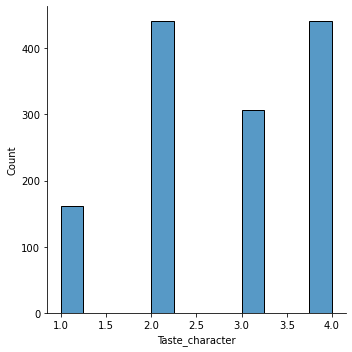

In [15]:
sns.displot(data["Taste_character"])

In [16]:
mytraindata_futures =data.drop(["Taste_character"], axis=1)

mytraindata_target= data["Taste_character"]

In [17]:
mytraindata_futures.head()

,Sample_number,Measuring_side,Device_number,Replicate_number
0,1,2,1,1
1,1,2,1,2
2,1,2,1,3
3,1,3,1,1
4,1,3,1,2


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mytraindata_futures, mytraindata_target,  random_state=42)

In [19]:
len(X_test) , len(X_train), len(y_train), len(y_test)

(338, 1012, 1012, 338)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 30)
tree.fit(X_train, y_train)
y_model =tree.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [23]:
print(confusion_matrix(y_test,y_model))

[[ 37   0   0   0]
 [  0 110   0   2]
 [  0   0  85   0]
 [  0   3   0 101]]


In [24]:
print(accuracy_score(y_test,y_model))

0.985207100591716


In [37]:
inputdata = (1,2,0,1)
inputdatasnumpy = np.asarray(inputdata)
inputdatares = inputdatasnumpy.reshape(1, -1)
pred = tree.predict(inputdatares)
print(pred)

if pred[0]== 1:
    print("the taste of the blueberries is sweet")
elif pred[0] == 2:
     print("the taste of the blueberries is neutral")
elif pred[0] == 3:
     print("the taste of the blueberries is lightly sour")
else:
     print("the taste of the blueberries is sour")
        
    

[2]
the taste of the blueberries is neutral


In [38]:
import pickle

In [39]:
filename = "DATA VONCK ET AL 2020.sav"
pickle.dump(tree, open(filename, "wb"))


In [40]:
# loading the saved model
loaded = pickle.load(open("DATA VONCK ET AL 2020.sav", 'rb'))

In [43]:
inputdata = (1,2,0,1)
inputdatasnumpy = np.asarray(inputdata)
inputdatares = inputdatasnumpy.reshape(1, -1)
pred = loaded.predict(inputdatares)
print(pred)

if pred[0]== 1:
    print("the taste of the blueberries is sweet")
elif pred[0] == 2:
     print("the taste of the blueberries is neutral")
elif pred[0] == 3:
     print("the taste of the blueberries is lightly sour")
else: 
     print("the taste of the blueberries is sour")
        

[2]
the taste of the blueberries is neutral
